In [1]:
#%pip install tensorflow

In [2]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import sys
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=sys.maxsize)

In [3]:
csv1 = pd.read_csv('sequence_execution_time.csv')
#csv1.head()

In [4]:
csv1.tail()

,sequence_identifier,read_sequence,quality,execution_time
3999995,@HWI-D00360:5:H814YADXX:1:1115:18756:14266 1:N...,ACTAATAAAGAAAAAAAGAGAGAAGAATCAAATAGACGCAATAAAA...,C@CFFFFFHHHHHJGEHHIJJJIJIIJJJJJIJJIFIIIIGIJJIJ...,341.792
3999996,@HWI-D00360:5:H814YADXX:1:1115:18805:14266 1:N...,ATAAATGAATAATAGGCGGTTTCTGACATCAGGAAGTTTAGACCGC...,CCCFFFFFGHHHHJJJJJJGIJHIJGIIJJIJJIIJHIJJIIJJJJ...,556.625
3999997,@HWI-D00360:5:H814YADXX:1:1115:18868:14278 1:N...,GTATGGAAATACCTGGATGTCCAGGCAGAAGTGTGCTACAGGGGCA...,@@CFFFFFHGHHHJIIIGIGHHAGGGIIBGG?ECCFFHIJJGEBDA...,8523.708
3999998,@HWI-D00360:5:H814YADXX:1:1115:18797:14322 1:N...,AACTCAGTAATTACTTTGATTTGGAGTCTTAATGCAATTTTACCCA...,CCCFFFFFHDHHHJJJJJJIJJJIJIHGHIIJJJJIJIJJJJJJJI...,880.708
3999999,@HWI-D00360:5:H814YADXX:1:1115:18971:14400 1:N...,GAAAATAGTTTCCCATTTGTTGCCACTGTTTTAAACTTACTGTTAT...,@@@FDFDBBDFFBFIGGGCFGFHHGIGEHIIIIEIIGE@GIIIGGI...,624.208


In [5]:
#csv1.describe()

In [6]:
#data = csv1.drop(['sequence_identifier','quality'], axis = 1)
data = csv1

In [7]:
data.isnull().sum()

sequence_identifier    0
read_sequence          0
quality                0
execution_time         0
dtype: int64

In [8]:
data1 = data.drop(csv1.index[500:]) #reduce dataset to 10% of original dataframe
#data.head()

In [9]:
data1.tail()

,sequence_identifier,read_sequence,quality,execution_time
495,@HWI-D00360:5:H814YADXX:1:1101:4753:2342 1:N:0...,AATTTACCTTGCCCAGATCCATCAGAGGAATCACTGTCTATGGCAG...,??@FFFFFHH?DFHHGHGHEEGHGGBHGAHGIBGE?C@CDFHHE9B...,5604.917
496,@HWI-D00360:5:H814YADXX:1:1101:4779:2350 1:N:0...,GCATGGAAAGCATTAGCCACTTGAATTCAAGGAAGAGCATTCTTGG...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ...,555.708
497,@HWI-D00360:5:H814YADXX:1:1101:4845:2365 1:N:0...,TTGCTTGAATCCGGGAGATGGAGGTTTGCAGTGAGCTGAAATCATG...,@@@DDDBDHBBDDD:G?GDEEGGH8BCHEGH?FDDFCHGGGEHHAG...,8450.375
498,@HWI-D00360:5:H814YADXX:1:1101:4891:2378 1:N:0...,GGCATTCTAAGTCACCCCCACAGCCCTCTAATGCCAGTCCAGCTGC...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJIIJJJIJJJJJJJJ...,670.417
499,@HWI-D00360:5:H814YADXX:1:1101:4940:2382 1:N:0...,AATAAAGTAAATTGAGTGGTAACTTTACAAAGACTTCAAAGTCAGC...,CCCFFFFDHHHHHJJJGIJIIJJJJJJJJJJJJJJJJJJJJIJJJJ...,555.750


In [10]:
#from sklearn.preprocessing import LabelEncoder
#le =LabelEncoder()

#seq_trans = le.fit_transform(data1["read_sequence"])
#seq_ide_trans = le.fit_transform(data1["sequence_identifier"])
#quali_trans = le.fit_transform(data1["quality"])


In [11]:
#data1['seq_encoded']=seq_trans
#data1['seq_id_encoded']=seq_ide_trans
#data1['qual_encoded']=quali_trans
#data1.head()

In [12]:
reads = data1.drop(['sequence_identifier','quality'], axis =1)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,2295.125
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,674.000
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,757.209
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,397.042
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,675.000
...,...,...
495,AATTTACCTTGCCCAGATCCATCAGAGGAATCACTGTCTATGGCAG...,5604.917
496,GCATGGAAAGCATTAGCCACTTGAATTCAAGGAAGAGCATTCTTGG...,555.708
497,TTGCTTGAATCCGGGAGATGGAGGTTTGCAGTGAGCTGAAATCATG...,8450.375
498,GGCATTCTAAGTCACCCCCACAGCCCTCTAATGCCAGTCCAGCTGC...,670.417


In [13]:
#Normalize data
reads['execution_time'] = np.log10(reads.execution_time)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,3.360806
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,2.828660
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,2.879216
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,2.598836
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,2.829304
...,...,...
495,AATTTACCTTGCCCAGATCCATCAGAGGAATCACTGTCTATGGCAG...,3.748569
496,GCATGGAAAGCATTAGCCACTTGAATTCAAGGAAGAGCATTCTTGG...,2.744847
497,TTGCTTGAATCCGGGAGATGGAGGTTTGCAGTGAGCTGAAATCATG...,3.926876
498,GGCATTCTAAGTCACCCCCACAGCCCTCTAATGCCAGTCCAGCTGC...,2.826345


In [14]:
def Kmers_funct(seq, size=3): #148 characters/sequence  size = 6 better? Used 4 previously.[SIze = 9 gave a r_sq = 1 is this the best value for data = 250, train = 0.8 random = 42, ngaram 4,4]??
    #Performed much better with same settings and more data. used 1000. r_sq reduced to 0.9999999999999962
   return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]
#convert our training data sequences into short overlapping k-mers of length 6. Lets do that for each species of data we have using our Kmers_funct function.
reads['words'] = reads.apply(lambda x: Kmers_funct(x['read_sequence']), axis=1)
reads = reads.drop('read_sequence', axis=1)

In [15]:
human_texts = list(reads['words'])
for item in range(len(human_texts)):
   human_texts[item] = ' '.join(human_texts[item])
#separate labels
Y = reads.iloc[:, 0].values # y_human for human_dna

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4)) # initially (4,4) 
X = cv.fit_transform(human_texts)
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfid = TfidfVectorizer(ngram_range = (4,4))
# X = tfid.fit_transform(human_texts)
#print(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1) 
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (400, 3978)
X_test (100, 3978)
y_train (400,)
y_test (100,)


In [18]:
Xnew = X_train.todense()
Xnew.shape

(400, 3978)

In [19]:
X_train_original = np.expand_dims(Xnew, 2)

In [20]:
#X_train_original = np.expand_dims(X_train, 2)
#X_train_original = X_train.reshape(len(X_train), 1, X_train.shape[1])
#X_train_original = X_train.reshape((X_train.getnnz()),X_train.shape[1],1)
#X_train_original = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
#X_train_original = X_train.reshape((X_train.todense()),X_train.shape[1],1)
#X_train_original = X_train.reshape((X_train.todense()),X_train.shape[1],1)

In [21]:
X_train_original.shape

(400, 3978, 1)

In [22]:
#XX_T = X_train_original **2  # squared, appears some values are negative
#XX_T.shape

In [23]:
import tensorflow as tf
from keras.optimizers import SGD
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout, LeakyReLU
#from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.layers import LSTM

2022-12-20 22:27:22.913100: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 22:27:23.026255: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-20 22:27:23.026276: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-20 22:27:23.051306: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-20 22:27:23.585455: W tensorflow/stream_executor/platform/de

In [24]:
model = Sequential()
model.add(LSTM(64, return_sequences = True, input_shape = (X_train_original.shape[1:]), activation=LeakyReLU(alpha=0.1))) #original filter size = 64 # 2 appears to avoid nan values
#model.add(Dropout(0.5))
#model.add(LSTM(128, activation = 'relu', return_sequences = True)) #original filter size 128 
model.add(Conv1D(8, kernel_size= 16,padding = 'same',activation = LeakyReLU(alpha=0.1))) #updated inputshape# changed again from 32 to 256
#model.add(Dropout(0.5))
model.add(Flatten()) # removing flatten introducing nan values and changes shape of output
#model.add(Dense(4, activation=LeakyReLU(alpha=0.1)))
model.add(Dense(1))

2022-12-20 22:27:24.271170: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-20 22:27:24.271219: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-20 22:27:24.271246: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tdt4173-08): /proc/driver/nvidia/version does not exist
2022-12-20 22:27:24.271543: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
#X_train = tf.reshape(X_train,shape = [-1,250,3])
#y_train = tf.reshape(y_train,shape = [-1,250,1])


In [26]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3978, 64)          16896     
                                                                 
 conv1d (Conv1D)             (None, 3978, 8)           8200      
                                                                 
 flatten (Flatten)           (None, 31824)             0         
                                                                 
 dense (Dense)               (None, 1)                 31825     
                                                                 
Total params: 56,921
Trainable params: 56,921
Non-trainable params: 0
_________________________________________________________________


In [27]:
#X_train = tf.reshape(X_train,shape = [-1,375,3])
#y_train = tf.reshape(y_train,shape = [-1,125,1])

In [28]:
#y_train = np.expand_dims(y_train, 1) # Take off , see what happens

In [29]:
#input_ids = input_ids.toarray()

In [30]:
Xtstnew = X_test.todense()
X_test_n = np.expand_dims(Xtstnew, 2)

In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [32]:
history = model.fit(X_train_original, y_train, 
                    epochs=50, verbose=1, batch_size=32, validation_split = 0.2,callbacks = [callback] ) #changed batch_size to 2 intitally 50 #validation_data = (X_test_n,y_test)

Epoch 1/50
10/10 [==============================] - 13s 1s/step - loss: 4.6012 - accuracy: 0.0000e+00 - val_loss: 0.4425 - val_accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 12s 1s/step - loss: 0.5385 - accuracy: 0.0000e+00 - val_loss: 0.2145 - val_accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 12s 1s/step - loss: 0.2980 - accuracy: 0.0000e+00 - val_loss: 0.2647 - val_accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 12s 1s/step - loss: 0.2003 - accuracy: 0.0000e+00 - val_loss: 0.1824 - val_accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 12s 1s/step - loss: 0.1685 - accuracy: 0.0000e+00 - val_loss: 0.1758 - val_accuracy: 0.0000e+00
Epoch 6/50
10/10 [==============================] - 12s 1s/step - loss: 0.1725 - accuracy: 0.0000e+00 - val_loss: 0.1714 - val_accuracy: 0.0000e+00
Epoch 7/50
10/10 [==============================] - 12s 1s/step - loss: 0.1682 - accuracy: 0.0000e+00 - val_loss

In [33]:
#Xtstnew = X_test.todense()
#X_test_n = np.expand_dims(Xtstnew, 2)

In [34]:
ypred = model.predict(X_test_n)

4/4 [==============================] - 1s 251ms/step


In [35]:
ypred.shape

(100, 1)

In [36]:
#print(ypred)

In [37]:
ypred_train = model.predict(X_train_original)

13/13 [==============================] - 4s 303ms/step


In [38]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,ypred_train)
r2_train

0.683757158401269

In [39]:
r2_test = r2_score (y_test,ypred)
r2_test 

-0.1787079233512614

In [40]:
from sklearn.metrics import mean_squared_error
print("MSE: %.4f" % mean_squared_error(y_test, ypred))

MSE: 0.2064


In [41]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y_test,ypred)**0.5
rmsle

0.11133946475363939

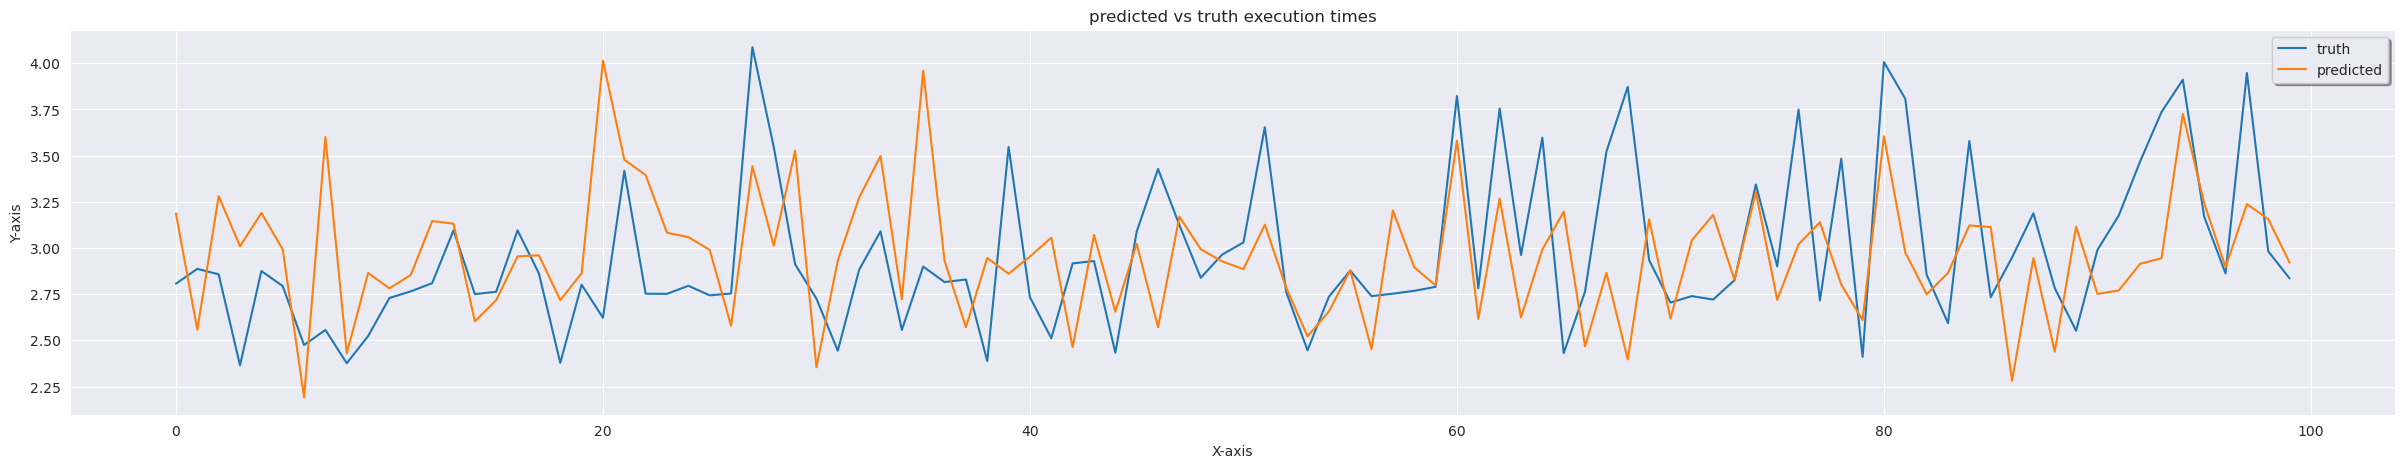

In [42]:
x_ax = range(len(y_test))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test, label="truth")
plt.plot(x_ax, ypred, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [43]:
y_pred_non_log = 10**(ypred)
y_test_non_log = 10**(y_test)

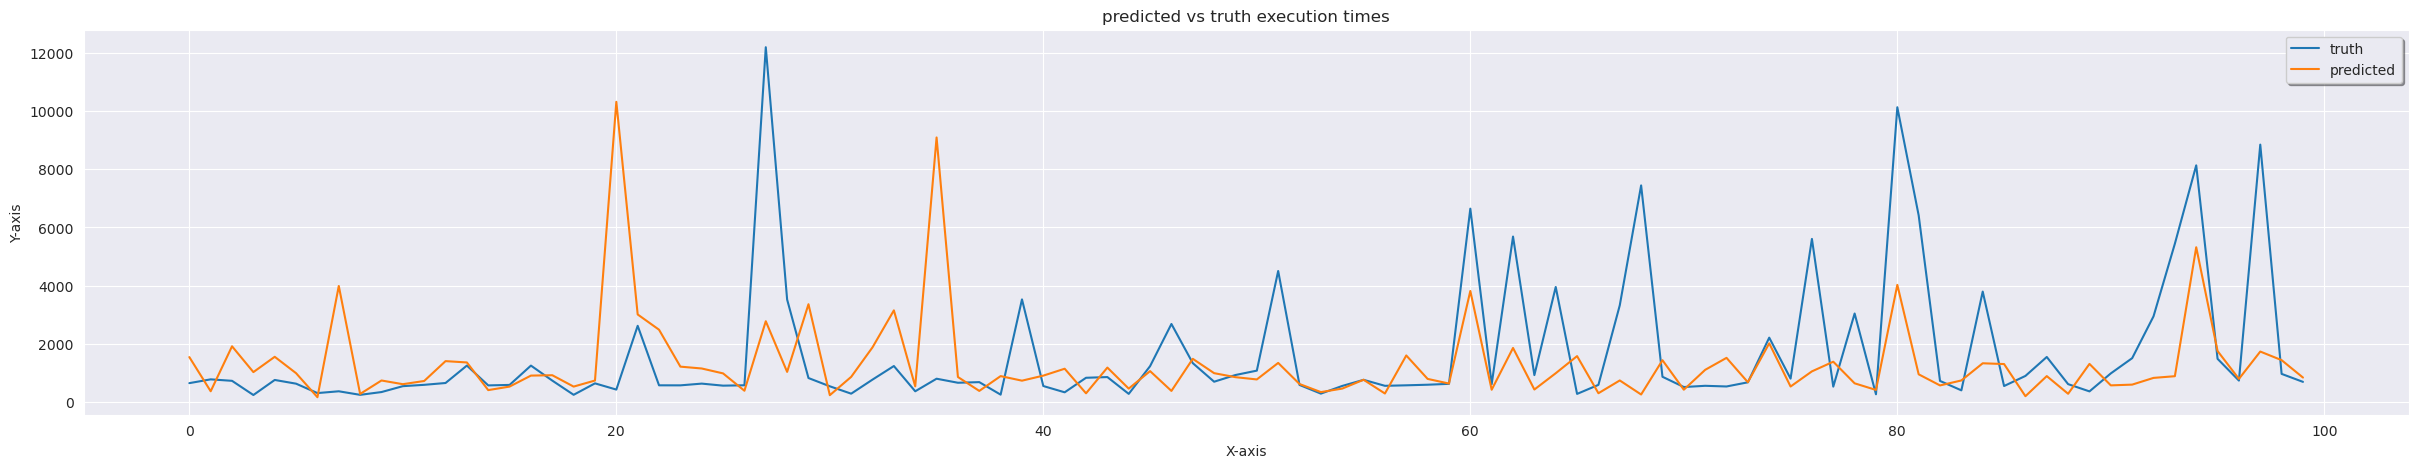

In [44]:
x_ax = range(len(y_test_non_log))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test_non_log, label="truth")
plt.plot(x_ax, y_pred_non_log, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

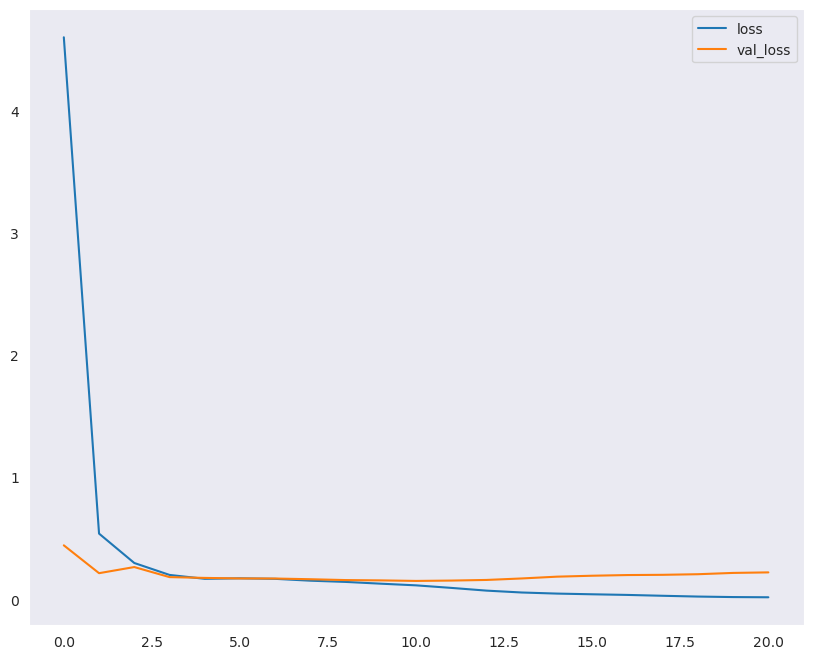

In [45]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
#plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
#plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()